### **Loading the dataset**

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [224]:
mylist = []
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)

###### **Convert  the  problem  into  a  binary  classification  problem  by  only  considering  two classes  and removing  the  third  one.**

In [225]:
data["target"] = iris.target

###### **Remove the target column from the train and test sets.**

In [226]:
data = data[data["target"]!=2]

In [227]:
X = data.drop(columns=["target"])
y = data["target"]

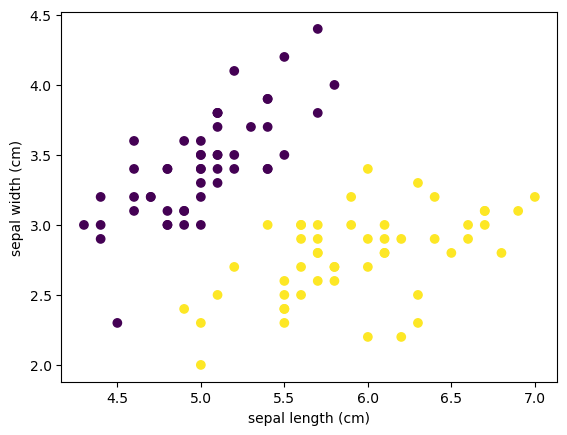

In [228]:
plt.scatter(X["sepal length (cm)"],X["sepal width (cm)"],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

###### **Split the data into train and test sets.**

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

###### **Apply the built-in Perceptron algorithm from scikit-learn.**

In [230]:
perceptron = Perceptron()
perceptron.fit(X_train,y_train)
y_pred = perceptron.predict(X_test)

###### **Evaluate the accuracy, precision, recall, and F1 score of the model.**

In [231]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

In [232]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)     
print("Recall: ",recall)
print("F1_score: ",f1_score)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0


###### **Scratch Code**

In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row[:-1], weights)  # Exclude the target label
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

l_rate = 0.1
n_epoch = 5

weights = train_weights(X_train.values, l_rate, n_epoch)
y_prediction = [predict(row, weights) for row in X_test.values]

accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='macro', zero_division=1)
recall = recall_score(y_test, y_prediction, average='macro', zero_division=1)
f1 = f1_score(y_test, y_prediction, average='macro', zero_division=1)


epoch=0, lrate=0.100, error=26.200
epoch=1, lrate=0.100, error=26.400
epoch=2, lrate=0.100, error=23.600
epoch=3, lrate=0.100, error=22.400
epoch=4, lrate=0.100, error=22.000


In [234]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 48.00%
Precision: 74.00%
Recall: 50.00%
F1 Score: 32.43%
